# Module 8: File I/O and Error Handling
March 5, 2021

Last time we covered data structures (lists, tuples, dictionaries, sets) in Python that allow us to work with more powerful data items than just the individual numbers, strings and Booleans that we had used before. We also discussed the important difference between call by value and call by reference.

Until now the course dealt with the basics of imperative programming in Python, and you have learned about the most important concepts that you need as a programmer. We will now leave the relatively secluded, controlled environment that we were in so far and look at how to read and write data from and to files, access online resources, use external libraries, and connected to that how to make programs more robust against errors that come from “the outside”. 

Today we will cover how to read and write files in general, how to deal with CSV files in particular, and how to handle runtime errors that can for example be caused by user inputs or file operations.

Next time (after the midterm exam) we will have a look at fetching data and other resources from the internet, and how to interact with web services from within Python programs. 

## Reading and Writing Files

Python distinguishes between only two types of files: text and binary. Basically, anything that is not a text file is regarded as a binary. Text files are sequences of lines, which are themselves sequences of characters that are terminated with a special end-of-line (EOL) character, often the newline character. The content of text files can be processed with the common string manipulation functionality, while processing binary files requires knowledge about their structure. For the moment we are only concerned with text files.

To open a file, first a file object needs to be created with the ```open()``` function:

```
<file_object> = open(<filename>, <mode>)
```

```<filename>``` is the name (path) of the file to open, and ```<mode>``` specifies for which kind of processing the file is opened ("r" for reading content, "w" for writing content, "a" for appending content, or "r+" for a special read and write mode).  For example:

In [14]:
# create a file object in reading mode
file = open("data/shorttext.txt", "r")
print(file)
file.close()

<_io.TextIOWrapper name='data/shorttext.txt' mode='r' encoding='UTF-8'>


When the file is opened, operations according to the chosen mode can be carried out. When all operations on the file have been performed, the file should be closed again to avoid unintended side effects:
```
file.close()
```
Play around with the following code examples and a small text file if your choice to see what happens. Add printouts to visualize what has been read by the different commands.

For example, when opened in reading mode we can call different functions for reading content from the file:

In [15]:
# creating a file object in reading mode
file = open("data/shorttext.txt", "r")

# file.read() to read all characters in the file
#content = file.read()
#print(content)

# file.read(n) to read the first/next n characters of the file
first_n = file.read(10)
print(first_n)

# file.readline() to read a (the first/next) line of the file
#first_line = file.readline()
#print(first_line)

# file.readlines to read the content of the files line by line
#lines = file.readlines()
#print(lines)

# close file
file.close()

Invisible 


When opened in writing mode, we can call diffent functions to write text into the file:

In [16]:
# creating a file object in writing mode
file = open("data/textdump.txt", "w")

# file.write to write (or append) text to a file
file.write("Hello World!\n")
file.write("It's cold today...\n")
file.writelines(["Another line\n", "and another line\n"]) 

# close file
file.close()

Change this example from writing to appending mode (parameter "a") and see what the difference is.

With the ```with```-statement, Python provides an alternative, elegant way to handle files. It also takes care of closing the file, so it is a good idea to make it a habit to use it for file handling (and never forget closing):

In [17]:
with open("data/shorttext.txt", "r") as file:
    content = file.read()
    
with open("data/newtext.txt", "w") as file:
    file.write("Hello World!\n")
    file.write("It's cold today...\n")
    file.writelines(["Another line\n", "and another line\n"])

Note that here is also a short and elegant way to iterate over all lines of a file, without explicitly calling ```readlines()``` before:

```
for line in file:
    <do something with line>
```    
    
As a more complete example, see the following code to read the text from a file, encrypt it using the Caesar cipher, and write it into another file:

In [18]:
from caesarcipher import CaesarCipher

with open("data/shorttext.txt", "r") as file:
    content = file.read()
    
content_encrypted = CaesarCipher(content, offset=3)

with open("data/shorttext_encrypted.txt", "w") as file:
    file.write(content_encrypted.encoded)

This code produces no output on the command line, but if you try it with a text file yourself, you will see the effect in the new file that is created.

## Dealing With CSV Files
Let's look at another kind of text file, that you will frequently come across when working on data science problems: CSV files. CSV stands for "comma-separated values" and means that commas are used to separate the values in a line from each other. Sometimes also other characters are used as separators, such as the tabulator "\t" or the semicolon ";", so don't be confused if you see that. As such, CSV files are a simple means to represent tabular data. The following example is based on the Dutch municipalities data set from Kaggle (https://www.kaggle.com/justinboon/municipalities-of-the-netherlands/data), stored in the file dutch_municipalities.csv. We can open and read this file as in the examples above:

In [19]:
with open("data/dutch_municipalities.csv", "r") as csvfile:
    print(csvfile.read())

municipality	province	latitude	longitude	surface_km2	population	avg_household_income_2012	avg_woz_2014	university
Aa en Hunze	Drenthe	53.010.485	6.749.528	278.9	25243	35500	225000	0
Aalburg	Noord-Brabant	51.751.294	5.057.085	53.17	12859	39100	249000	0
Aalsmeer	Noord-Holland	52.262.164	4.761.922	32.29	30792	40900	276000	0
Aalten	Gelderland	51.926.667	6.580.678	96.57	27030	33300	194000	0
Achtkarspelen	Friesland	53.210.357	6.153.565	103.98	28002	30500	165000	0
Alblasserdam	Zuid-Holland	51.870.337	4.670.202	10.06	19822	35500	195000	0
Albrandswaard	Zuid-Holland	51.858.068	4.423.187	23.75	25044	42700	255000	0
Alkmaar	Noord-Holland	52.632.842	4.755.037	31.2	94906	32300	181000	0
Almelo	Overijssel	52.367.027	6.668.492	69.4	72435	31000	156000	0
Almere	Flevoland	52.350.785	5.264.702	248.77	196156	34900	182000	0
Alphen aan den Rijn	Zuid-Holland	52.111.222	4.647.251	132.49	106809	36900	220000	0
Alphen-Chaam	Noord-Brabant	51.509.135	4.861.589	93.51	9712	40000	295000	0
Ameland	Friesland	53.440.564	5.

In this form (as one long string) the content of the CSV file is of course not of too much use, as it is difficult to access individual elements from it. Instead of reading the content file completely, we could read it line by line (getting a list of lines), and then split the lines at the separator to create a list or dictionary of the elements in each row of the table, resulting in big list of lists or list of dictionaries. Luckily, however, CSV files are so common that there is a package called csv that provides this and other frequently needed functionality for working with CSV files (please refer to the online documentation at https://docs.python.org/3/library/csv.html for full reference). Here are some examples of what working with the package can look like:

In [2]:
# import the csv library
import csv

# csv.reader returns the content of the file as list of lists of strings
with open("data/dutch_municipalities.csv", "r") as csvfile:
    csvreader = csv.reader(csvfile, delimiter='\t')
    for row in csvreader:
        print(row[0])

municipality
Aa en Hunze
Aalburg
Aalsmeer
Aalten
Achtkarspelen
Alblasserdam
Albrandswaard
Alkmaar
Almelo
Almere
Alphen aan den Rijn
Alphen-Chaam
Ameland
Amersfoort
Amstelveen
Amsterdam
Apeldoorn
Appingedam
Arnhem
Assen
Asten
Baarle-Nassau
Baarn
Barendrecht
Barneveld
Bedum
Beek
Beemster
Beesel
Berg en Dal
Bergeijk
Bergen (L.)
Bergen (NH.)
Bergen op Zoom
Berkelland
Bernheze
Best
Beuningen
Beverwijk
De Bilt
Binnenmaas
Bladel
Blaricum
Bloemendaal
Bodegraven-Reeuwijk
Boekel
Ten Boer
Borger-Odoorn
Borne
Borsele
Boxmeer
Boxtel
Breda
Brielle
Bronckhorst
Brummen
Brunssum
Bunnik
Bunschoten
Buren
Capelle aan den IJssel
Castricum
Coevorden
Cranendonck
Cromstrijen
Cuijk
Culemborg
Dalfsen
Dantumadiel
Delft
Delfzijl
Deurne
Deventer
Diemen
Dinkelland
Doesburg
Doetinchem
Dongen
Dongeradeel
Dordrecht
Drechterland
Drimmelen
Dronten
Druten
Duiven
Echt-Susteren
Edam-Volendam
Ede
Eemnes
Eemsmond
Eersel
Eijsden-Margraten
Eindhoven
Elburg
Emmen
Enkhuizen
Enschede
Epe
Ermelo
Etten-Leur
Ferwerderadiel
De Fryske

In [3]:
# csv.DictReader returns the content of the file as list of dictionaries, using the first row of the CSV file as keys
with open("data/dutch_municipalities.csv", "r") as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter='\t')
    for row in csvreader:
        print(f'{row["municipality"]}: {row["university"]}')

Aa en Hunze: 0
Aalburg: 0
Aalsmeer: 0
Aalten: 0
Achtkarspelen: 0
Alblasserdam: 0
Albrandswaard: 0
Alkmaar: 0
Almelo: 0
Almere: 0
Alphen aan den Rijn: 0
Alphen-Chaam: 0
Ameland: 0
Amersfoort: 0
Amstelveen: 0
Amsterdam: 2
Apeldoorn: 0
Appingedam: 0
Arnhem: 0
Assen: 0
Asten: 0
Baarle-Nassau: 0
Baarn: 0
Barendrecht: 0
Barneveld: 0
Bedum: 0
Beek: 0
Beemster: 0
Beesel: 0
Berg en Dal: 0
Bergeijk: 0
Bergen (L.): 0
Bergen (NH.): 0
Bergen op Zoom: 0
Berkelland: 0
Bernheze: 0
Best: 0
Beuningen: 0
Beverwijk: 0
De Bilt: 0
Binnenmaas: 0
Bladel: 0
Blaricum: 0
Bloemendaal: 0
Bodegraven-Reeuwijk: 0
Boekel: 0
Ten Boer: 0
Borger-Odoorn: 0
Borne: 0
Borsele: 0
Boxmeer: 0
Boxtel: 0
Breda: 0
Brielle: 0
Bronckhorst: 0
Brummen: 0
Brunssum: 0
Bunnik: 0
Bunschoten: 0
Buren: 0
Capelle aan den IJssel: 0
Castricum: 0
Coevorden: 0
Cranendonck: 0
Cromstrijen: 0
Cuijk: 0
Culemborg: 0
Dalfsen: 0
Dantumadiel: 0
Delft: 1
Delfzijl: 0
Deurne: 0
Deventer: 0
Diemen: 0
Dinkelland: 0
Doesburg: 0
Doetinchem: 0
Dongen: 0
Dongera

In [22]:
# same as the previous example, but printing only municipalitiers with and average household income above 40000
with open("data/dutch_municipalities.csv", "r") as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter='\t')
    for row in csvreader:
        if int(row["university"]) > 0:
            print(f'{row["municipality"]}: {row["university"]}')

Amsterdam: 2
Delft: 1
Eindhoven: 1
Enschede: 1
Groningen: 1
Leiden: 1
Maastricht: 1
Nijmegen: 1
Rotterdam: 1
Tilburg: 1
Utrecht: 1
Wageningen: 1


If you want to do more advanced things with the data from CSV files, like for example merge, join, or concatenate tables from different CSV files, you can absolutely do that with CSV files read in as above and the knowledge about loops, conditions, list, dictionaries etc. that you have, but it can be a bit tricky. This is why when such operations are (likely to be) needed, it is usually recommended to use the pandas library (http://pandas.pydata.org/), which has some specialized functions for this.

Pandas has an own function for reading CSV files, which returns the result as a so-called data frame, as shown in the following example:

In [23]:
import pandas as pd

df = pd.read_csv('data/dutch_municipalities.csv', sep="\t")
print(df)

            municipality       province    latitude  longitude  surface_km2  \
0            Aa en Hunze        Drenthe  53.010.485  6.749.528       278.90   
1                Aalburg  Noord-Brabant  51.751.294  5.057.085        53.17   
2               Aalsmeer  Noord-Holland  52.262.164  4.761.922        32.29   
3                 Aalten     Gelderland  51.926.667  6.580.678        96.57   
4          Achtkarspelen      Friesland  53.210.357  6.153.565       103.98   
5           Alblasserdam   Zuid-Holland  51.870.337  4.670.202        10.06   
6          Albrandswaard   Zuid-Holland  51.858.068  4.423.187        23.75   
7                Alkmaar  Noord-Holland  52.632.842  4.755.037        31.20   
8                 Almelo     Overijssel  52.367.027  6.668.492        69.40   
9                 Almere      Flevoland  52.350.785  5.264.702       248.77   
10   Alphen aan den Rijn   Zuid-Holland  52.111.222  4.647.251       132.49   
11          Alphen-Chaam  Noord-Brabant  51.509.135 

Data frames are two-dimensional labeled data structures, very much like tables. The rows are labeled by an index (typically ascending from 0), and the columns are labeled by the column names, corresponding to the kind of data that is contained in them. See https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe for further details.

Data frames have a number of attributes, such as the column labels, the row indices and the types of the data in the columns (see a full list at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), that can be accessed as illustrated below:

In [24]:
print(df.index)
print(df.columns)
print(df.dtypes)

RangeIndex(start=0, stop=380, step=1)
Index(['municipality', 'province', 'latitude', 'longitude', 'surface_km2',
       'population', 'avg_household_income_2012', 'avg_woz_2014',
       'university'],
      dtype='object')
municipality                  object
province                      object
latitude                      object
longitude                     object
surface_km2                  float64
population                   float64
avg_household_income_2012    float64
avg_woz_2014                 float64
university                     int64
dtype: object


Via the ```iloc``` attribute we can access a row by its index, for example:

In [25]:
print(df.iloc[39])
print(type(df.iloc[39]))

municipality                    De Bilt
province                        Utrecht
latitude                     52.109.272
longitude                     5.180.968
surface_km2                       67.13
population                        42013
avg_household_income_2012         43100
avg_woz_2014                     338000
university                            0
Name: 39, dtype: object
<class 'pandas.core.series.Series'>


Apparently, such single row of a data frame is of type “Series” (see https://pandas.pydata.org/pandas-docs/stable/reference/series.html for full reference), which basically means a one-dimensional labeled data structure. Series are iterable. You have maybe already noticed that many functions in, e.g., pandas and matplotlib take Series as input, and this is one way to get them.

Slicing works with ```iloc```, too, so a range of indices can be used to access several rows at a time. The result is of type “DataFrame” again:

In [26]:
print(df.iloc[39:42])
print(type(df.iloc[39:42]))

   municipality       province    latitude  longitude  surface_km2  \
39      De Bilt        Utrecht  52.109.272  5.180.968        67.13   
40   Binnenmaas   Zuid-Holland  51.796.188  4.548.157        75.57   
41       Bladel  Noord-Brabant  51.362.963  5.213.639        75.62   

    population  avg_household_income_2012  avg_woz_2014  university  
39     42013.0                    43100.0      338000.0           0  
40     28682.0                    39300.0      231000.0           0  
41     19825.0                    37200.0      272000.0           0  
<class 'pandas.core.frame.DataFrame'>


Similarly, a list of indices (not necessarily a range) can be used:

In [27]:
print(df.iloc[[38,40,42]]) 
print(type(df.iloc[[38,40,42]]))

   municipality       province    latitude  longitude  surface_km2  \
38    Beverwijk  Noord-Holland  52.486.984  4.657.447        20.09   
40   Binnenmaas   Zuid-Holland  51.796.188  4.548.157        75.57   
42     Blaricum  Noord-Holland  52.272.669  5.248.080        15.56   

    population  avg_household_income_2012  avg_woz_2014  university  
38     40052.0                    32500.0      178000.0           0  
40     28682.0                    39300.0      231000.0           0  
42      9112.0                    51600.0      536000.0           0  
<class 'pandas.core.frame.DataFrame'>


The ```iloc``` access can also be used for indexing at both axes of the data frame, including accessing a single element (note the different resulting data types):

In [28]:
print(df.iloc[1:3,1:3])
print(type(df.iloc[1:3,1:3]))
print(df.iloc[3,3])
print(type(df.iloc[3,3]))

        province    latitude
1  Noord-Brabant  51.751.294
2  Noord-Holland  52.262.164
<class 'pandas.core.frame.DataFrame'>
6.580.678
<class 'str'>


Very similar to ```iloc```, the loc attribute can be used to access (groups of) rows and columns by their labels. For example (note the difference in the interpretation of the range now that the labels of the indexes are used):

In [29]:
print(df.loc[1:3,"population"])

1    12859.0
2    30792.0
3    27030.0
Name: population, dtype: float64


Without using any attributes, just in pairs of square brackets, columns in a dataframe can be addressed by their name. For example, to access the “murders_2014” column of our example data frame, it’s name can be used as reference:

In [30]:
print(df["population"])
print(type(df["population"]))

0       25243.0
1       12859.0
2       30792.0
3       27030.0
4       28002.0
5       19822.0
6       25044.0
7       94906.0
8       72435.0
9      196156.0
10     106809.0
11       9712.0
12       3565.0
13     150943.0
14      85135.0
15     853312.0
16     157535.0
17      12049.0
18     150817.0
19      67209.0
20      16479.0
21       6617.0
22      24344.0
23      47375.0
24      54176.0
25      10475.0
26      16268.0
27       8919.0
28      13593.0
29      18956.0
         ...   
350     25487.0
351     13977.0
352     23906.0
353     41010.0
354     23170.0
355     23031.0
356     13843.0
357     28873.0
358     21654.0
359     50607.0
360     23592.0
361     15751.0
362     12386.0
363     14407.0
364    150911.0
365     27207.0
366     16588.0
367     13661.0
368     21543.0
369     61337.0
370     32254.0
371    123614.0
372      8089.0
373     18767.0
374     40878.0
375     21374.0
376     47154.0
377     22148.0
378     44546.0
379    123211.0
Name: population, Length

Again, the output is a Series, so this is another way to get this data structure.

Accessing several columns at once is also possible, the result is a data frame:

In [31]:
print(df[["municipality","population"]])
print(type(df[["municipality","population"]]))

            municipality  population
0            Aa en Hunze     25243.0
1                Aalburg     12859.0
2               Aalsmeer     30792.0
3                 Aalten     27030.0
4          Achtkarspelen     28002.0
5           Alblasserdam     19822.0
6          Albrandswaard     25044.0
7                Alkmaar     94906.0
8                 Almelo     72435.0
9                 Almere    196156.0
10   Alphen aan den Rijn    106809.0
11          Alphen-Chaam      9712.0
12               Ameland      3565.0
13            Amersfoort    150943.0
14            Amstelveen     85135.0
15             Amsterdam    853312.0
16             Apeldoorn    157535.0
17            Appingedam     12049.0
18                Arnhem    150817.0
19                 Assen     67209.0
20                 Asten     16479.0
21         Baarle-Nassau      6617.0
22                 Baarn     24344.0
23           Barendrecht     47375.0
24             Barneveld     54176.0
25                 Bedum     10475.0
2

Another handy feature is to filter data frames based on certain criteria. For example, we might only want to see the data of municipalities with at least 150,000 inhabitants:

In [32]:
print(df[df["population"]>=150000])

      municipality       province    latitude  longitude  surface_km2  \
9           Almere      Flevoland  52.350.785  5.264.702       248.77   
13      Amersfoort        Utrecht  52.156.111  5.387.827        63.86   
15       Amsterdam  Noord-Holland  52.370.216  4.895.168       219.30   
16       Apeldoorn     Gelderland  52.211.157  5.969.923       341.15   
18          Arnhem     Gelderland  51.985.103  5.898.730       101.54   
52           Breda  Noord-Brabant  51.571.915  4.768.323       128.68   
92       Eindhoven  Noord-Brabant  51.441.642  5.469.722        88.87   
96        Enschede     Overijssel  52.221.537  6.893.662       142.72   
116  's-Gravenhage   Zuid-Holland  52.070.498  4.300.700        98.12   
117      Groningen      Groningen  53.219.383  6.566.502        83.75   
122        Haarlem  Noord-Holland  52.387.388  4.646.219        32.09   
221       Nijmegen     Gelderland  51.812.563  5.837.226        57.60   
272      Rotterdam   Zuid-Holland  51.924.420  4.47

Or the data for the province of Utrecht:

In [33]:
print(df[df["province"]=="Utrecht"])

            municipality province    latitude  longitude  surface_km2  \
13            Amersfoort  Utrecht  52.156.111  5.387.827        63.86   
22                 Baarn  Utrecht  52.213.182  5.286.410        33.01   
39               De Bilt  Utrecht  52.109.272  5.180.968        67.13   
57                Bunnik  Utrecht  52.066.528  5.200.776        37.57   
58            Bunschoten  Utrecht  52.240.642  5.367.070        34.81   
88                Eemnes  Utrecht  52.253.746  5.261.275        33.70   
157               Houten  Utrecht  52.002.991  5.185.760        58.99   
160          IJsselstein  Utrecht  52.017.765  5.040.300        21.68   
186              Leusden  Utrecht  52.131.793  5.429.469        58.89   
192                Lopik  Utrecht  51.974.861  4.945.148        78.98   
213            Montfoort  Utrecht  52.036.213  4.951.859        38.20   
218           Nieuwegein  Utrecht  52.024.821  5.091.819        25.65   
250            Oudewater  Utrecht  52.024.163  4.86

Or for the municipalities in the province of Utrecht with at least 150,000 inhabitants:

In [34]:
print(df[(df["population"]>=150000) & (df["province"]=="Utrecht")])

    municipality province    latitude  longitude  surface_km2  population  \
13    Amersfoort  Utrecht  52.156.111  5.387.827        63.86    150943.0   
315      Utrecht  Utrecht  52.090.737  5.121.420        99.21    328577.0   

     avg_household_income_2012  avg_woz_2014  university  
13                     36900.0      222000.0           0  
315                    34300.0      223000.0           1  


Note that are several other clever ways to access (ranges of) values in data frames, but discussing them all would be out of scope of this lecture. We will see some of them in the examples later on, but if you are interested in digging deeper into this, please refer to the official “Indexing and Selecting Data” guide at http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html or ask Google if you are looking for hints how to index best in a specific situation.

In the following we will look at a few methods that pandas data frames provide. This selection is by no means complete, either, but you can find the full list at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html.

For example, there are methods to easily sum up values, or get basic statistic information like the max, min, mean and median values. Just to show a few:

In [35]:
print(f"Population was {df['population'].sum()} in total.")
print(f"The maximum population in a municipality was "\
      f"{df['population'].max()}.")
print(f"The average population per municipality was "\
      f"{df['population'].mean():.3f}.")
print(f"The average population per municipality with at "\
      f"least 1 university was "\
      f"{df[df['university']>=1]['population'].mean():.3f}.")

Population was 16589696.0 in total.
The maximum population in a municipality was 853312.0.
The average population per municipality was 44121.532.
The average population per municipality with at least 1 university was 261600.250.


The ```hist``` method can be used to plot simple histograms from data:

AxesSubplot(0.125,0.125;0.775x0.755)


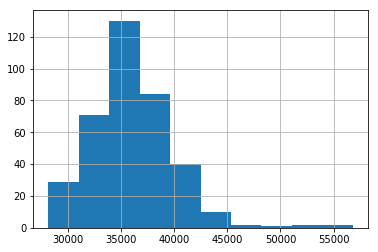

In [36]:
print(df["avg_household_income_2012"].hist())

Or, with a larger number of bins:

AxesSubplot(0.125,0.125;0.775x0.755)


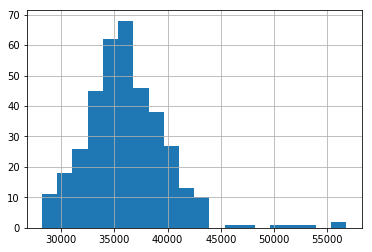

In [37]:
print(df["avg_household_income_2012"].hist(bins=20))

If a data frame contains several columns with numeric values, the ```hist``` method will create histograms for all of them. For example, when called on the whole data frame:

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5744122750>


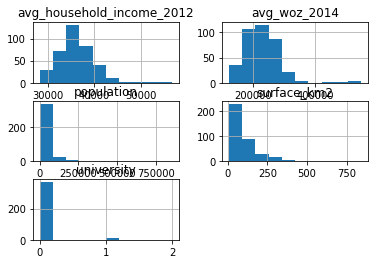

In [38]:
print(df.hist())

The possibilities for making histograms with ```hist()``` more “beautiful” are a bit limited, so other libraries should be used when a better design is wanted. However, for a quick check of the distribution of data in a data frame it is very suitable.

As a last example for today, we want to sort the data in the data frame according to average household income (descending), instead of having them sorted by municipality, like it is now. The ```sort_values()``` method is what we need:

In [39]:
sorted_df = df.sort_values("avg_household_income_2012", ascending=False)
print(sorted_df)

            municipality       province    latitude  longitude  surface_km2  \
273            Rozendaal     Gelderland  52.009.785  5.966.507        27.92   
43           Bloemendaal  Noord-Holland  52.404.947  4.620.185        45.18   
340            Wassenaar   Zuid-Holland  52.142.910  4.401.213        62.37   
42              Blaricum  Noord-Holland  52.272.669  5.248.080        15.56   
177                Laren  Noord-Holland  52.256.817  5.224.155        12.41   
133            Heemstede  Noord-Holland  52.351.063  4.620.300         9.64   
231           Oegstgeest   Zuid-Holland  52.186.226  4.474.810         7.97   
176        Lansingerland   Zuid-Holland  51.998.714  4.516.263        56.37   
249         Ouder-Amstel  Noord-Holland  52.285.929  4.913.383        25.78   
39               De Bilt        Utrecht  52.109.272  5.180.968        67.13   
336               Waalre  Noord-Brabant  51.387.833  5.443.202        22.66   
157               Houten        Utrecht  52.002.991 

Note that the index column was sorted with the rest of the data, too. So, if we want to have indices there running up from 0, we need to reset the index:

In [40]:
sorted_reindexed_df = sorted_df.reset_index(drop=True)
print(sorted_reindexed_df)

            municipality       province    latitude  longitude  surface_km2  \
0              Rozendaal     Gelderland  52.009.785  5.966.507        27.92   
1            Bloemendaal  Noord-Holland  52.404.947  4.620.185        45.18   
2              Wassenaar   Zuid-Holland  52.142.910  4.401.213        62.37   
3               Blaricum  Noord-Holland  52.272.669  5.248.080        15.56   
4                  Laren  Noord-Holland  52.256.817  5.224.155        12.41   
5              Heemstede  Noord-Holland  52.351.063  4.620.300         9.64   
6             Oegstgeest   Zuid-Holland  52.186.226  4.474.810         7.97   
7          Lansingerland   Zuid-Holland  51.998.714  4.516.263        56.37   
8           Ouder-Amstel  Noord-Holland  52.285.929  4.913.383        25.78   
9                De Bilt        Utrecht  52.109.272  5.180.968        67.13   
10                Waalre  Noord-Brabant  51.387.833  5.443.202        22.66   
11                Houten        Utrecht  52.002.991 

Finally, note that data frames can easily be saved as CSV files with the ```to_csv()``` method. For example:

In [41]:
sorted_reindexed_df.to_csv('data/dutch_municipalities_sorted.csv')

We will see more about data frames in the following lecture(s).

## Error Handling
There are basically two kinds of errors that can be detected by the Python interpreter: syntax (aka parsing) errors and exceptions (aka runtime or execution-time errors). ```SyntaxErrors``` are caused by syntactically incorrect code (like invalid variable names, forgotten indentations, braces, quotation marks or colons, etc.; Spyder will often already point you to them). They are fixed by correcting the code accordingly. Syntactically correct code can however still cause exceptions during exection. For example, a division by zero will result in a ```ZeroDivisonError```, and a type mismatch between str and int will result in a ```TypeError```. We say that an exception is "thrown" at runtime when the respective error occurs, and we can add code to "catch" and handle it if that happens (and thus prevent the program from simply crashing). That is done by the try-and-except construct in Python. Simply put, it defines what should be tried, and what happens if that goes wrong:

```
try:
    <do something>
except <error>:
    <do something to react on error>
```

For example, a `ValueError` is thrown when the user's input is not convertible into an integer, so we can catch it and display an error message accordingly:

In [42]:
try:
    x = int(input("Please enter a number: "))
except ValueError:
    print("That was no valid number.")

Please enter a number:  23


In this case, it would in practice be handy if the user is asked to try again, until (s)he enters a valid input. Maybe even encapsulated into a function, to have a specific, error-handling reader available for reuse:

In [43]:
def read_integer(prompt):
    while True:
        try:
            x = int(input(prompt))
            return x
        except ValueError:
            print("That was no valid number. Try again.")
            
# in main program:
number = read_integer("Please enter a number:" )

KeyboardInterrupt: Interrupted by user

As another example: When handling files, it can easily happen that the path to the file to be opened is not correct, and the file cannot be opened. Then the ```FileNotFoundError``` can be caught to prevent the program from crashing because of that:

In [ ]:
filename = input("Enter file name: ")
while True:
    try:
        with open(filename, "r") as file:
            print(file.read())
        break
    except FileNotFoundError:
        print("File not found. Please try again.")
        filename = input("Enter file name: ")

There are several built-in exceptions in Python. We cannot go through them all, but you find them listed at https://docs.python.org/3/library/exceptions.html.

Often several things can potentially go wrong, so that it makes sense to catch several exceptions:

In [ ]:
number1 = read_integer("Enter number 1: ")
number2 = read_integer("Enter number 2: ")
try:
    print(number1 * number2)
    print(number1 / number2)
except (FloatingPointError, OverflowError, ZeroDivisionError):
    print("Something went wrong with the calculation.")

Or in a more specific variant, distinguishing between division by zero and all other kinds of errors:

In [ ]:
number1 = read_integer("Enter number 1: ")
number2 = read_integer("Enter number 2: ")
try:
    print(number1 * number2)
    print(number1 / number2)
except ZeroDivisionError:
    print("Division by 0!")
except:
    print("Something went wrong with the calculation.")

As you can maybe guess from the previous example, and except clause with no specific error defined will catch all (remaining) errors that happen in the try clause. In such a case, it is often useful to assign a name to the exception that is caught, so that the error-handling code can check its type or get the underlying error message, to deal with the exception accordingly. For example:

In [ ]:
number1 = read_integer("Enter number 1: ")
number2 = read_integer("Enter number 2: ")
try:
    print(number1 * number2)
    print(number1 / number2)
except Exception as err:
    print("Error handling for:", err)

Finally, note that with the ```raise``` statement it is also possible to let your own code throw one of the predefined or also self-defined exceptions:

In [ ]:
temperature = read_integer("Enter temperature: ")
try:
    if 0 < temperature < 100:
        print("Water is liquid.")
    else:
        raise Exception("incompatible temperature", temperature)
except Exception as err:
    print(err) 

In practice it needs a bit of experience to decide how and where to implement error-handling behavior in a software. In the scope of the projects that you are working on in this course, it would not be feasible to surround each individual statement by try-and-except clauses. As a practical rule, error-handling should be implemented at places where things can easily go wrong, such as reading input from the user (even users with a lot of goodwill make typos), handling files (working with file systems is always prone to unexpected behavior) or accessing online resources and services (communication with them can be affected by network problems etc.). Generally, the less control the programmer (or their code) has over what happens, the more error-handling is a good idea.

## Exercises

Please use Quarterfall to submit and check your answers. 

### 1. Interview Anonymization (★★★★☆)
Imagine you are a journalist, and you have written a text about an interview with somebody. Because the person wants to remain unrecognized, you have to replace their name through a fictive one everywhere in the text before it gets published. Write a Python program that reads the file containing the interview text, replaces all occurrences of the original name by a new one (the `str.replace()` function can be used here), and saves the changed text in the file. You can use the text file "interview-with-a-syrian-refugee.txt" or create an own one. Do not forget to implement error-handling.

### 2. Longest Word (★★★★☆)
Reuse your code from exercise 5.5 (Text Analysis) to create a function that finds the longest word in a text. Apply it to the text file that you used for exercise 1 above. The output should be something like: 
```
The longest word in the text is "responsibility".
```
Again, keep in mind to implement error-handling.

### 3. Randomized Story-Telling (★★★★☆)
One of the simple pen-and-paper games I remember from my childhood days goes as follows: A paper sheet is divided into four columns for the questions “Who?”, “Does what?”, “How?” and “Where?”. The first player would write down a person in the first column, then fold it away, the second would fill in a verb, fold it away, etc. After the fourth column has been filled, the complete sentence is read out. It could then be something like “My brother is showering excessively at the gas station.”

Write a program that creates a user-defined number of such random sentences. The file `“inputs.csv”` contains a list of possible answers to all of the four questions. Take the values from there. Feel free to add further words to the CSV file to create more variation. The output of the program should be something like:
```
How many sentences do you want to create? 3
My granny is dancing massively at the fair.
The butcher is travelling aggressively in bed.
My grandpa is reading nicely in the bathroom.
```

### 4. Population and Universities per Province (★★★★☆)
Write a Python program that reads in the CSV file `"dutch_municipalities.csv"` that we already used in the lecture. Sum up the population and universities for each province and write the result into a new CSV file `“dutch_provinces.csv”`, in alphabetical order of the province names. Its content should look like:
```
province,population,universities
Drenthe,488892.0,0
Flevoland,400179.0,0
Friesland,580537.0,0
Gelderland,1993851.0,2
Groningen,495508.0,1
Limburg,1119751.0,1
Noord-Brabant,2390214.0,2
Noord-Holland,2766854.0,2
Overijssel,1139754.0,1
Utrecht,1254034.0,1
Zeeland,380619.0,0
Zuid-Holland,3579503.0,3
```

### 5. Error Handling (★★★☆☆)
Add adequate "try and except" error handling to your code for exercises 1.-4.
Include it in all code that you write from now on, at least when dealing with user inputs, file reading/writing operations, and accessing resources or services on the web.

## Extras for the Weekend
Exercise 3 was hopefully a bit of fun, but of course we generated a very simple kind of prose text there. The website https://eh.bard.edu/generating-algorithmic-poetry/ describes how to use Python to automatically generate poems in the style of Shakespeare or Dickinson. Have a look if you find that interesting!